## Appel des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import de fichier CSV

In [2]:
df = pd.read_csv('dataset.csv', index_col=0)

## Affichage 5 première /derniere valeurs

In [3]:
df.head()
#Les 5 premières

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.tail()
#Les 5 derniers

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


## Affichage des types de données

In [5]:
df.dtypes

name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

## Affichage des Colonnes

In [6]:
df.columns.values

array(['name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'], dtype=object)

# Il existe trois types de variables : 
### Objects (string)
name, category, main_category, currency, deadline, launched, state, country
### Int64
backers
### Float64
goal, pledged, usd pledged, usd_pledged_real, usd_goal_real

## On va vérifier si nous avons des valeurs manquantes

In [7]:
df.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

#### Nous avons 3797 valeurs manquantes dans la colonnes usd pledged et 4 valeurs manquantes dans name

## On va vérifier si nous avons des valeurs dupliquées

In [8]:
df.duplicated().sum()

0

#### Il n y a pas de valeurs dupliqées

## Calcul des state des projets en pourcentage  

In [9]:

percentual_sucess = round(df["state"].value_counts() / len(df["state"]) * 100,2)

print("State Percentual in %: ")
print(percentual_sucess)

state = round(df["state"].value_counts() / len(df["state"]) * 100,2)

labels = list(state.index)
values = list(state.values)



State Percentual in %: 
failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64


##### Seulement 35.38% des projets ont réussit

## Les catégories les plus populaires

Categories in category:  159


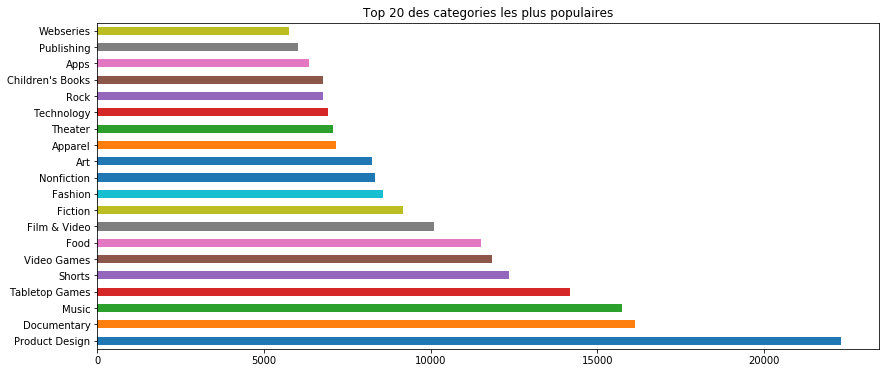

In [10]:
print('Categories in category: ', df['category'].nunique())
df['category'].value_counts()[:20].plot(kind='barh', 
                                        figsize=(14,6), 
                                        title='Top 20 des categories les plus populaires')

## Les cartegories principaux

Categories in main_category:  15


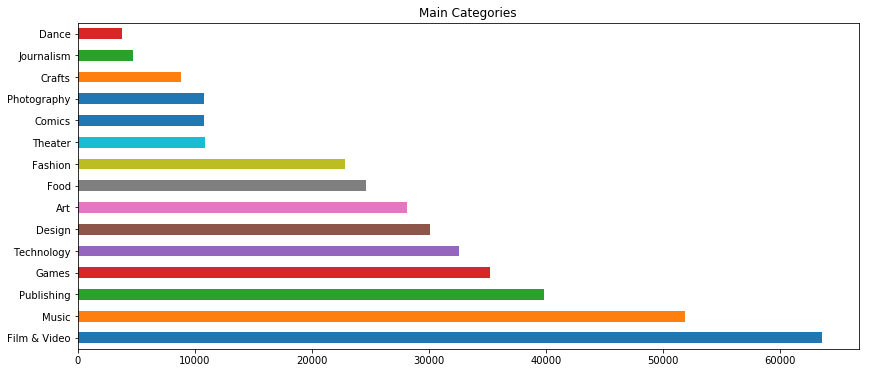

In [11]:
print('Categories in main_category: ', df['main_category'].nunique())
df['main_category'].value_counts().plot(kind='barh', 
                                        figsize=(14,6), 
                                        title='Main Categories')

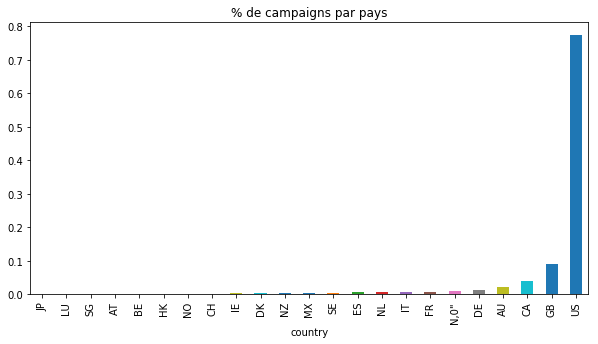

In [12]:
proportion_currency = df.groupby(['country'])['country'].count() / df['name'].count()
proportion_currency.sort_values(ascending=True).plot(kind='bar', title='% de campaigns par pays', figsize=(10,5))

# On va stocker le mois et l'année de début des projets dans deux variables différents

In [13]:
df['launched'] = pd.to_datetime(df['launched'])
pd._libs.tslib.Timestamp
df['launched_month'] = df['launched'].apply(lambda x: x.month)
df['launched_year'] = df['launched'].apply(lambda x: x.year)

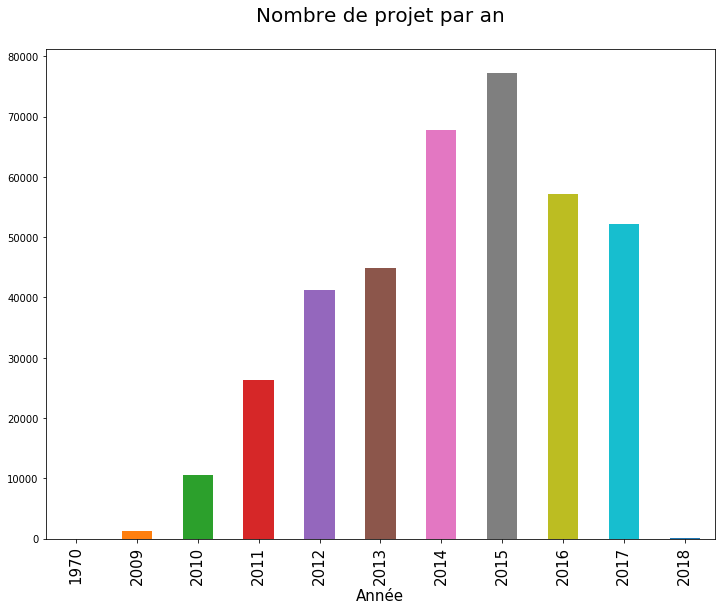

launched_year
1970        7
2009     1329
2010    10519
2011    26237
2012    41165
2013    44851
2014    67745
2015    77300
2016    57184
2017    52200
2018      124
Name: launched_year, dtype: int64


In [14]:
df.groupby('launched_year')['launched_year'].count().plot(kind='bar',
                                                           figsize=(12,9))
plt.title('Nombre de projet par an\n',fontsize=20)
plt.xlabel('Année',fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print(df.groupby('launched_year')['launched_year'].count())

## On va ajouter un variable success pour savoir si le porjet est fini avec succés

In [15]:
df.state
df['sucess'] = [1 if i == "successful" else 0 for i in df['state']]

## On va étudier la corrélation

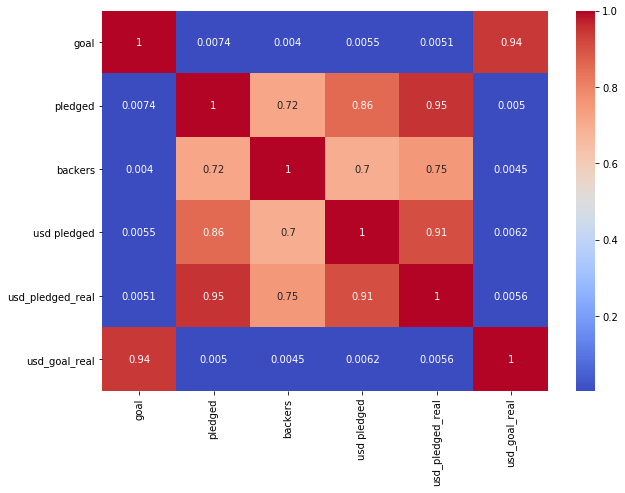

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.drop(['launched_month','launched_year',"sucess"],axis=1).corr(),cmap='coolwarm',annot=True)
plt.show()

# On va explorer plus particulierement les données possédant un coef de corrélation supérieur a 0,75
## On voit s'intéresser par la corrélation entre la colonne "backers" et la colonne "pledged". 

## Outliers

In [17]:
highBacker = df[df['backers']>=60000]
highPledge = df[df['pledged']>=5000000]

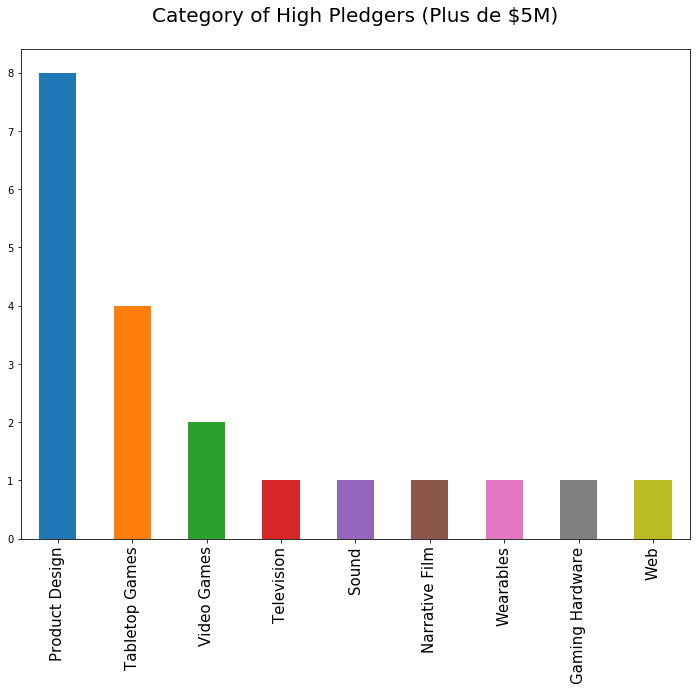

Product Design     8
Tabletop Games     4
Video Games        2
Television         1
Sound              1
Narrative Film     1
Wearables          1
Gaming Hardware    1
Web                1
Name: category, dtype: int64


In [18]:
highPledge['category'].value_counts().plot(kind='bar',
                                          figsize=(12,9))
plt.title('Category of High Pledgers (Plus de $5M)\n',fontsize=20)
plt.xticks(fontsize=15)
plt.show()
print(highPledge['category'].value_counts())

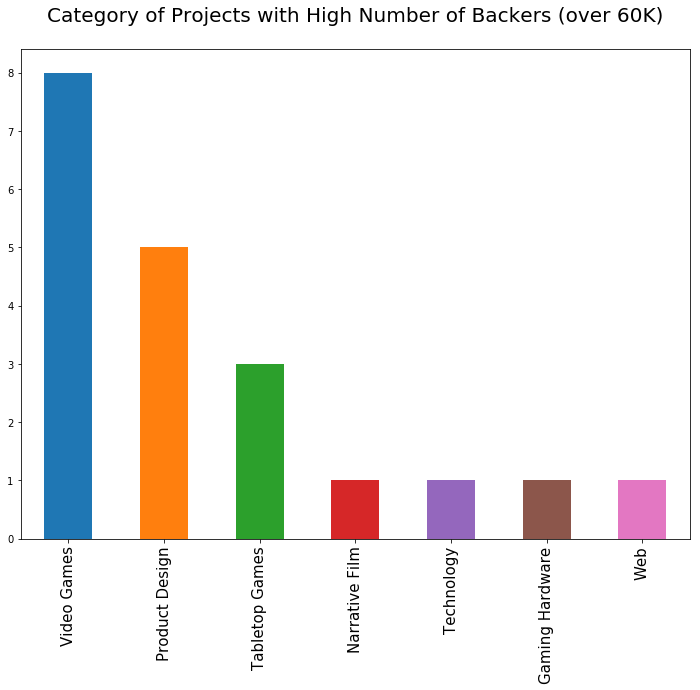

Video Games        8
Product Design     5
Tabletop Games     3
Narrative Film     1
Technology         1
Gaming Hardware    1
Web                1
Name: category, dtype: int64


In [19]:
highBacker['category'].value_counts().plot(kind='bar',
                                          figsize=(12,9))
plt.title('Category of Projects with High Number of Backers (over 60K)\n',fontsize=20)
plt.xticks(fontsize=15)
plt.show()
print(highBacker['category'].value_counts())

In [24]:
df['discrepancy'] = df['goal'] - df['usd_pledged_real']
df['target_reached'] = df['discrepancy'] <= 0

target_reached = df.loc[lambda df: df['target_reached'] == True]
target_not_reached = df.loc[lambda df: df['target_reached'] == False]
target_reached_perc = round(len(target_reached) / len(df) * 100, 2)
target_not_reached_perc = round(len(target_not_reached) / len(df) * 100, 2)

print('Parmis les {} campaigns:\n\n{} % ont achevés le target.'.format(len(df), 
                                                                            target_reached_perc))
print('Pour les {} de campaigns qui ont achevés leur target,\n\
il y avait en moyenne {} USD pledged plus que le target.\n'.format(len(target_reached), 
                                                                  round(target_reached['usd_pledged_real'].mean(), 2)))

print('{} % des campaigns non pas achevés leur target.\n\
Pour le {} campaigns qui non pas achevés leur target,\n\
il y avait en moyenne {} USD pledged moins que le target.'.format(target_not_reached_perc, 
                                                                  len(target_not_reached), 
                                                                  round(target_not_reached['usd_pledged_real'].mean(), 2)))

Parmis les 378661 campaigns:

34.93 % ont achevés le target.
Pour les 132255 de campaigns qui ont achevés leur target,
il y avait en moyenne 22997.36 USD pledged plus que le target.

65.07 % des campaigns non pas achevés leur target.
Pour le 246406 campaigns qui non pas achevés leur target,
il y avait en moyenne 1577.66 USD pledged moins que le target.


In [21]:
top_campaign = df.loc[df['usd_pledged_real'].idxmax()]
top_name = df.loc[df['usd_pledged_real'].idxmax()]['name']
top_goal = df.loc[df['usd_pledged_real'].idxmax()]['goal']
top_pledged = df.loc[df['usd_pledged_real'].idxmax()]['usd_pledged_real']
top_backers = df.loc[df['usd_pledged_real'].idxmax()]['backers']

print('Le campaign avec le plus grand montant pledged est \n"{}".\n\n\
Le goal du campaign était {}, mais eventuellement \n{:.2f} (Plus que 20 millions) USD était pledged.\n\n\
{} de personne backed le campaign.'.format(top_name,int(top_goal),top_pledged,top_backers))


Le campaign avec le plus grand montant pledged est 
"Pebble Time - Awesome Smartwatch, No Compromises".

Le goal du campaign était 500000, mais eventuellement 
20338986.27 (Plus que 20 millions) USD était pledged.

78471 de personne backed le campaign.


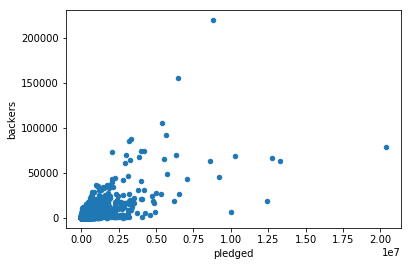

## Conclusion

#### on remarque que la grandes sommes des investissement est dans les projets de product design avec des sommes tres importantes, et il y a un tres grands nombres de backers qui investisent dans les video games la majorités des campaigns qui ont achevés leurs goal ont en moyenne 22997 USD de plus que leur goal.